# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

### Author declaration:
Some of the code blocks used below are learned and originally from Udacity course - Deep Learning. 

In [1]:
import numpy as np
from glob import glob

## load filenames for human and dog images from the Udacity server
#human_files = np.array(glob("/data/lfw/*/*"))
#dog_files = np.array(glob("/data/dog_images/*/*/*"))
## load filenames for human and dog images from local computer
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


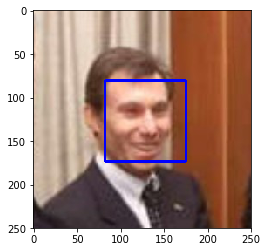

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
The accuracy of 100 human images in human face detector: 98.00%.
The accuracy of 100 dog images in human face detector: 17.00%

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_counter = 0
dog_counter = 0
for human_path, dog_path in zip(range(100), range(100)):
    if(face_detector(human_files_short[human_path])):
        human_counter += 1
    if(face_detector(dog_files_short[dog_path])):
        dog_counter += 1
print("the percentage of 100 human images in human face detector: %.2f%%" %float((human_counter/100)*100))
print("the percentage of 100 dog images in human face detector: %.2f%%" %float((dog_counter/100)*100))



the percentage of 100 human images in human face detector: 98.00%
the percentage of 100 dog images in human face detector: 17.00%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 97926926.02it/s] 


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [17]:
from PIL import Image
import torchvision.transforms as transforms
from torchvision import datasets
from torch.autograd import Variable

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    #image = Image.open(img_path).convert('RGB')
    
    #normalize = transforms.Normalize(
       #mean=[0.485, 0.456, 0.406],
       #std=[0.229, 0.224, 0.225]
    #)
    #data_transform = transforms.Compose([#transforms.RandomResizedCrop(224), 
                                         #transforms.Resize((224,224)),
                                         #transforms.ToTensor(),
                                         #normalize
                                         #])
    #image = data_transform(image)[:3,:,:].unsqueeze(0)
    
    normalize = transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225])
    
    image_size = 224
    loader = transforms.Compose([transforms.Resize((image_size,image_size)), transforms.ToTensor(),
                                normalize])
    def image_loader(image_path):
        ### load image, returns tensor
        image = Image.open(image_path)
        image = loader(image).float()
        image = Variable(image, requires_grad=False)
        image = image.unsqueeze(0)  #for vgg 16 or resnet-50? 
        if use_cuda:
            return image.cuda() 
        else:
            return image
    image = image_loader(img_path)
    
    

    output = VGG16(image)
    if use_cuda:
        output = output.cuda()
    _, pred = torch.max(output.data, 1) 
    index = pred.item()
    
    ### *** find the labels for ImageNet class, should be length 151 - 268
    
    return index # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [19]:
print("image path: ", dog_files[265])
print("test:", VGG16_predict(dog_files[100]))

image path:  /data/dog_images/train/024.Bichon_frise/Bichon_frise_01714.jpg
test: 236


In [20]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    if(VGG16_predict(img_path) in range(151,269)):
        return True
    else:
        return False
    # altervative: 
    # pred = VGG16_predict(img_path)
    # return ((pred <= 268) & (pred >= 151)) 

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
1) 100% accuracy for human_files_short images in dog_detector.

2) 1% percent for human_files_short images in dog_detector

In [21]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

human_counter = 0
dog_counter = 0
for human_path, dog_path in zip(range(100), range(100)):
    if(dog_detector(human_files_short[human_path])):
        human_counter += 1
    if(dog_detector(dog_files_short[dog_path])):
        dog_counter += 1
print("the accuracy of 100 human images in dog detector: %.2f%%" %float((human_counter/100)*100))
print("the accuracy of 100 dog images in dog detector: %.2f%%" %float((dog_counter/100)*100))

the accuracy of 100 human images in dog detector: 1.00%
the accuracy of 100 dog images in dog detector: 100.00%


* the accuracy of 100 human images in dog detector alexnet is: 0.01
* the accuracy of 100 dog images in dog detector alexnet is: 0.95

We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [134]:
import torch
import torchvision.models as models

# define VGG16 model
net50 = models.resnet50(pretrained=True)
## switch to evaluation mode
net50.eval() 
## use train to fine tuning
#model.train()
# check if CUDA is available
use_cuda = torch.cuda.is_available()

# Freeze training for all "features" layers
#for param in net50.features.parameters():
#    param.require_grad = False
    
# move model to GPU if CUDA is available
if use_cuda:
    net50 = net50.cuda()

In [135]:
from PIL import Image
import torchvision.transforms as transforms
from torchvision import datasets
Image.LOAD_TRUNCATED_IMAGES = True
from torch.autograd import Variable


def net50_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to resnet-50 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    #image = Image.open(img_path).convert('RGB')
   # normalize = transforms.Normalize(
   #    mean=[0.485, 0.456, 0.406],
   #    std=[0.229, 0.224, 0.225]
    #)
    #data_transform = transforms.Compose([transforms.Resize(224,224),
                                         ##transforms.RandomResizedCrop(224), 
                                         #transforms.ToTensor(),
                                         #normalize
                                         #])
    #output = data_transform(image)[:3,:,:].unsqueeze(0)
    #output = net50(output)
    
    ## pre-process image
    normalize = transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225])
    
    image_size = 224
    loader = transforms.Compose([transforms.Resize((image_size,image_size)), 
                                 #transforms.RandomResizedCrop(image_size),
                                 transforms.ToTensor(),
                                normalize])
    def image_loader(image_path):
        ### load image, returns tensor
        image = Image.open(image_path)
        image = image.convert('RGB')
        image = loader(image).float()
        image = Variable(image, requires_grad=False)
        image = image.unsqueeze(0)  #for vgg 16 or resnet-50? 
        if use_cuda:
            return image.cuda() 
        else:
            return image
    image_tensor = image_loader(img_path)
    #print(image_tensor.shape), ## size should be (1,3,224,224)
    output = net50(image_tensor)
    #print(output.data.shape)
    _, pred = torch.max(output.data, 1) 
    index = pred.item()
    
    ### *** find the labels for ImageNet class, should be length 151 - 268
    
    return index # predicted class index

In [136]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector_net50(img_path):
    pred = net50_predict(img_path)
    return ((pred <= 268) & (pred >= 151)) 
    #if(net50_predict(img_path) in range(151,269)):
    #    return True
    #else:
    #    return False

In [8]:
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

human_counter = 0
dog_counter = 0
for human_path, dog_path in zip(range(100), range(100)):
    if(dog_detector_net50(human_files_short[human_path])):
        human_counter += 1
    if(dog_detector_net50(dog_files_short[dog_path])):
        dog_counter += 1
print("the accuracy of 100 human images in resnet - 50 dog detector: %.2f%%" %float((human_counter/100)*100))
print("the accuracy of 100 dog images in resnet - 50 dog detector: %.2f%%" %float((dog_counter/100)*100))

the accuracy of 100 human images in resnet - 50 dog detector: 0.00%
the accuracy of 100 dog images in resnet - 50 dog detector: 100.00%


* the accuracy of 100 human images in dog detector alexnet is: 1%
* the accuracy of 100 dog images in dog detector alexnet is: 96%

* the accuracy of 100 human images in dog detector resnet - 50 is: 0.00
* the accuracy of 100 dog images in dog detector resnet - 50 is: 100%

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [40]:
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms


from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 100

# define the transformation
normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # randomly flip and rotate
    #transforms.RandomAffine([-10,10], translate = (0.2, 0.2), shear = 10),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    normalize
    ])

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
# prepare data loaders (combine dataset and sampler)

data_transfer = {}
#data_transfer['train'] = datasets.ImageFolder('/data/dog_images/train/', transform=transform)
#data_transfer['valid'] = datasets.ImageFolder('/data/dog_images/valid/', transform=transform)
#data_transfer['test'] = datasets.ImageFolder('/data/dog_images/test/', transform=transform)
## data from local computer
data_transfer['train'] = datasets.ImageFolder('dogImages/train/', transform=transform)
data_transfer['valid'] = datasets.ImageFolder('dogImages/valid/', transform=transform)
data_transfer['test'] = datasets.ImageFolder('dogImages/test/', transform=transform)



loaders_scratch = {}
loaders_scratch['train'] = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                            shuffle=True,
                                            num_workers=num_workers, 
                                           )
loaders_scratch['valid'] = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
                                            shuffle=True,
                                            num_workers=num_workers)
loaders_scratch['test'] = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                            shuffle=True,
                                            num_workers=num_workers)




In [41]:
loaders_scratch['train']
for batch_idx, (data, target) in enumerate(loaders_scratch['test']):
    print(batch_idx, data.shape, "return the batch size = 80 class indices for 80 images:", target.shape)
    if(batch_idx > 5):
        break

0 torch.Size([100, 3, 224, 224]) return the batch size = 80 class indices for 80 images: torch.Size([100])
1 torch.Size([100, 3, 224, 224]) return the batch size = 80 class indices for 80 images: torch.Size([100])
2 torch.Size([100, 3, 224, 224]) return the batch size = 80 class indices for 80 images: torch.Size([100])
3 torch.Size([100, 3, 224, 224]) return the batch size = 80 class indices for 80 images: torch.Size([100])
4 torch.Size([100, 3, 224, 224]) return the batch size = 80 class indices for 80 images: torch.Size([100])
5 torch.Size([100, 3, 224, 224]) return the batch size = 80 class indices for 80 images: torch.Size([100])
6 torch.Size([100, 3, 224, 224]) return the batch size = 80 class indices for 80 images: torch.Size([100])


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 
* I use transforms.Resize(224) because it does not change the content of the image compared to cropping. 
 * The input tensor is normalized. The size would be (batch_size,244,244,3) corresponding to 3 RGB channels
* I argument the data in order for the network to learn a more generalized pattern rather than memorized the informations. I use random flip and rotations. 

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [42]:
# takes in a module and applies the specified weight initialization
def weights_init_normal(m):
    classname = m.__class__.__name__
    # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # get the number of the inputs
        n = m.in_features
        y = (1.0/np.sqrt(n))
        m.weight.data.normal_(0, y)
        m.bias.data.fill_(0)

In [43]:
import torch.nn as nn
import torch.nn.functional as F
# check if CUDA is available
use_cuda = torch.cuda.is_available()

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        ## two efficitive structures: either 4 convolutional layer with kernel size 2, 
        ## or 3 convolutional layer with kernel size 3
        # convolutional layer (sees 224x224x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 2, padding=1)
        # convolutional layer (sees 112x112x16 tensor)
        self.conv2 = nn.Conv2d(16, 64, 2, padding=1)
        # convolutional layer (sees 56x56x32 tensor)
        self.conv3 = nn.Conv2d(64, 128, 2, padding=1)
        ## convolutional layer (sees 28x28x64 tensor)
        self.conv4 = nn.Conv2d(128, 256,2, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # global average pooling layer, the ouput size is [28 X 28] the size of the 
        #input H X W of the feature map
        self.avgpool = nn.AdaptiveAvgPool2d(14)
        # linear layer (64 * 4 * 4 -> 500), set no bais for batch normalization
        self.fc1 = nn.Linear(256 * 14 * 14, 256, bias=False)
        ## apply the batch normalization before the softmax activation function
        self.batchnorm = nn.BatchNorm1d(256)
        # linear layer (500 -> 10)
        self.fc2 = nn.Linear(256, 133)
        # dropout layer (p=0.25)
        self.dropout_2 = nn.Dropout(0.25)
        self.dropout_1 = nn.Dropout(0.1)
        

    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        #x = self.dropout_1(x)
        x = self.pool(F.relu(self.conv2(x)))
        #x = self.dropout_1(x)
        x = self.pool(F.relu(self.conv3(x)))
        x = self.dropout_1(x)
        x = self.pool(F.relu(self.conv4(x)))
        x = self.dropout_1(x)
        x = self.avgpool(x)
        # flatten image input
        x = x.view(-1, 256 * 14 * 14)
        # x = x.view(x.size(0), -1)
        # add dropout layer
        x = self.dropout_2(x)
        # add 1st hidden layer, with relu activation function
        #x = F.relu(self.fc1(x))
        ## normalize the last layer's output
        ## the batch normalization generally performed before the non-linear
        ## activation function. 
        x = F.relu(self.batchnorm(self.fc1(x)))
        # add dropout layer
        x = self.dropout_2(x)
        # add 2nd hidden layer, with ? activation function
        ## nn.LogSoftmax(dim=1)
        x = self.fc2(x)

        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
### add weight initialization from normal distribution, can be improved? 
model_scratch.apply(weights_init_normal)
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (avgpool): AdaptiveAvgPool2d(output_size=14)
  (batchnorm): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=50176, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=133, bias=True)
  (dropout_2): Dropout(p=0.25)
  (dropout_1): Dropout(p=0.1)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
Firstly, we have a series of convolutional layers and apply max pooling layers to detect features from the input image, Relu activation functions are applied for each convolutional layers to turn all negative pixel values into zeros. Then we flatten the image to a one dimensional tensor, before apply the fully connected layers. The number of output classes are equal to the total amount of dog breeds. Finally, we can apply the softmax activation function to generate a series of probabilities corresponding to the predicted classes. The class with the highest probability are the most likely dog breed of the input image. Moreover, between each fully connnected layers, I apply the dropout layer to mitigate the overfitting, it should be noted that max pooling layers are there to prevent overfitting as well. 



### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [44]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion_scratch = nn.CrossEntropyLoss()

# specify optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.025, momentum=0.9)
#optimizer_scratch = optim.RMSprop(model_scratch.parameters(), lr=0.1)
#optimizer_scratch = torch.optim.Adam(model_scratch.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [45]:
import matplotlib.pyplot as plt

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    ## recored losses for plot
    losses = {'train':[], 'validation':[]}
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
        #for batch_idx, (data, target) in enumerate(train_loader):   
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += ( (1 / (batch_idx + 1)) * (loss.data - train_loss) )
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
        #for batch_idx, (data, target) in enumerate(valid_loader): 
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
                           
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            #valid_loss += loss.item()*data.size(0)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
    
        # calculate average losses
        #train_loss = train_loss/len(loaders['train'].dataset)
        #valid_loss = valid_loss/len(loaders['valid'].dataset)

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss    
        
        ## record the train and validation loss for each epochs
        losses['train'].append(train_loss)
        losses['validation'].append(valid_loss)

    plt.plot(losses['train'], label='Training loss')
    plt.plot(losses['validation'], label='Validation loss')
    plt.legend()
    _ = plt.ylim()    
    # return trained model
    return model


# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch_new.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch_new.pt'))

Epoch: 1 	Training Loss: 4.781500 	Validation Loss: 4.601139
Validation loss decreased (inf --> 4.601139).  Saving model ...
Epoch: 2 	Training Loss: 4.440815 	Validation Loss: 4.361509
Validation loss decreased (4.601139 --> 4.361509).  Saving model ...
Epoch: 3 	Training Loss: 4.244933 	Validation Loss: 4.287996
Validation loss decreased (4.361509 --> 4.287996).  Saving model ...
Epoch: 4 	Training Loss: 4.067500 	Validation Loss: 4.324405
Epoch: 5 	Training Loss: 3.907982 	Validation Loss: 4.102394
Validation loss decreased (4.287996 --> 4.102394).  Saving model ...
Epoch: 6 	Training Loss: 3.750396 	Validation Loss: 3.968072
Validation loss decreased (4.102394 --> 3.968072).  Saving model ...
Epoch: 7 	Training Loss: 3.588984 	Validation Loss: 4.001078
Epoch: 8 	Training Loss: 3.414987 	Validation Loss: 3.733730
Validation loss decreased (3.968072 --> 3.733730).  Saving model ...
Epoch: 9 	Training Loss: 3.223705 	Validation Loss: 3.811717
Epoch: 10 	Training Loss: 3.097919 	Valida

KeyboardInterrupt: 

In [ ]:
## plot the loss against epochs, if valid loss is decrease with train loss means the
## training needs to be continued, and model not overfitting in current epoch (iteration). 
## if two losses starts to depart, it means overfitting of data, we might consider stop training
## L1 l2 REGULARIZATION, data argumentation, etc.
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [33]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.
    
    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
model_scratch.eval()
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.559543


Test Accuracy: 21% (177/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [7]:
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# define the transformation
normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    ### translate=(a, b), then horizontal shift is randomly sampled in the range -img_width * a < dx < img_width * a and vertical shift is randomly sampled in the range -img_height * b < dy < img_height * b.
    # transforms.RandomAffine(20, translate = (0,2, 0,2), shear = 30)
    transforms.RandomHorizontalFlip(), # randomly flip and rotate
    transforms.RandomRotation(30),
    transforms.ToTensor(),
    normalize
    ])

## Specify appropriate transforms, and batch_sizes
# prepare data loaders (combine dataset and sampler)

data_transfer = {}
## data from local computer
data_transfer['train'] = datasets.ImageFolder('dogImages/train/', transform=transform)
data_transfer['valid'] = datasets.ImageFolder('dogImages/valid/', transform=transform)
data_transfer['test'] = datasets.ImageFolder('dogImages/test/', transform=transform)
## data from the Udacity server
#data_transfer['train'] = datasets.ImageFolder('/data/dog_images/train/', transform=transform)
#data_transfer['valid'] = datasets.ImageFolder('/data/dog_images/valid/', transform=transform)
#data_transfer['test'] = datasets.ImageFolder('/data/dog_images/test/', transform=transform)


loaders_transfer = {}
loaders_transfer['train'] = torch.utils.data.DataLoader(data_transfer['train'], batch_size=batch_size,
                                            shuffle=True,
                                            num_workers=num_workers, 
                                           )
loaders_transfer['valid'] = torch.utils.data.DataLoader(data_transfer['valid'], batch_size=batch_size, 
                                            shuffle=True,
                                            num_workers=num_workers)
loaders_transfer['test'] = torch.utils.data.DataLoader(data_transfer['test'], batch_size=batch_size, 
                                            shuffle=True,
                                            num_workers=num_workers)

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [8]:
import torchvision.models as models
import torch.nn as nn
### try different models like: VGG - 16, ResNet-50, Inception V3
## TODO: Specify model architecture 

# check if CUDA is available
use_cuda = torch.cuda.is_available()

## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)
print(model_transfer)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [9]:
# optionally, Freeze training for all "features" layers, not required for fine tuning
#for param in model_transfer.features.parameters():
#    param.require_grad = False
#for param in model_transfer.parameters():
#    param.require_grad = False
print("the number of output features:")
model_transfer.fc.in_features

the number of output features:


2048

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
The dog detection has been performed with VGG19, Alexnet, InceptionV3, and ResNet-50 with pretrained features on Imagenet. It has been found that ResNet-50 (pretrained on Imagenet) provided the best accuracy on detecting dogs with identical hyper-parameter settings. Since we have a relevant large dataset, I use the fine-tuning for the transfer learning model, and the weights are initialized as the pretrained model weights. The last fully connected layer has been replaced with customized output classes of 133, corresponding to the number of dog breeds. I also compared the fine-tuning with freezed features (end of convNet), the result shows that the fine-tuning provide better initial loss, and faster convergence rates. 
Resnet-50 has Conv2d, BatchNorm2d, AvgPool2d, maxpool2d, Relu and other layers. 

In [15]:
n_inputs = model_transfer.fc.in_features

# new layers automatically have requires_grad = True
last_layer = nn.Linear(n_inputs, 133)

model_transfer.fc = last_layer

# check to see that your last layer produces the expected number of outputs
print("the number of output features:", model_transfer.fc.out_features)

the number of output features: 133


In [13]:
## for customized fine tune 
# fix the parameter for first 2 stacks of Convs of pre-trained model
#for param in list(model.parameters())[:8]:
#    param.requires_grad = False

# filter out the parameters to be fine tuned
#params = filter(lambda p: p.requires_grad, model.parameters())

# only pass the parameters which did not freezed to the optimizer
#optimizer = optim.SGD(params, lr=0.0001, momentum, weigth_decay)

In [14]:
# ** optionally, randomize the weights in fully connected layer.
## takes in a module and applies the specified weight initialization
#def weights_init_normal(m):
#    classname = m.__class__.__name__
#    # for every Linear layer in a model..
#    if classname.find('Linear') != -1:
#        # get the number of the inputs
#        n = m.in_features
#        y = (1.0/np.sqrt(n))
#        m.weight.data.normal_(0, y)
#        m.bias.data.fill_(0)
        
#model_transfer.apply(weights_init_normal)

In [16]:
## pass model to GPU
if use_cuda:
    model_transfer = model_transfer.cuda()

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [17]:
import torch.optim as optim
# specify loss function (categorical cross-entropy)
criterion_transfer = nn.CrossEntropyLoss()
# specify optimizer (stochastic gradient descent) and learning rate = 0.0001
# end of conv net
#optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.001, momentum = 0.9, 
# weight_decay = 0.1)
# fine tune
optimizer_transfer = optim.SGD(model_transfer.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [17]:
import numpy as np
n_epochs = 25

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
        #for batch_idx, (data, target) in enumerate(train_loader):   
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += ( (1 / (batch_idx + 1)) * (loss.data - train_loss) )
            
        ######################    
        # validate the model #
        ######################
        model.eval() 
        for batch_idx, (data, target) in enumerate(loaders['valid']):
        #for batch_idx, (data, target) in enumerate(valid_loader): 
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
                           
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            #valid_loss += loss.item()*data.size(0)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
    
        # calculate average losses
        #train_loss = train_loss/len(loaders['train'].dataset)
        #valid_loss = valid_loss/len(loaders['valid'].dataset)

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss    
    # return trained model
    return model


# train the model
model_transfer = train(n_epochs, loaders_transfer, model_transfer, 
                       optimizer_transfer, criterion_transfer, 
                       use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 4.760524 	Validation Loss: 4.522728
Validation loss decreased (inf --> 4.522728).  Saving model ...
Epoch: 2 	Training Loss: 4.360328 	Validation Loss: 4.041355
Validation loss decreased (4.522728 --> 4.041355).  Saving model ...
Epoch: 3 	Training Loss: 3.898192 	Validation Loss: 3.502767
Validation loss decreased (4.041355 --> 3.502767).  Saving model ...
Epoch: 4 	Training Loss: 3.431360 	Validation Loss: 2.970050
Validation loss decreased (3.502767 --> 2.970050).  Saving model ...
Epoch: 5 	Training Loss: 2.989043 	Validation Loss: 2.522160
Validation loss decreased (2.970050 --> 2.522160).  Saving model ...
Epoch: 6 	Training Loss: 2.625334 	Validation Loss: 2.166278
Validation loss decreased (2.522160 --> 2.166278).  Saving model ...
Epoch: 7 	Training Loss: 2.313761 	Validation Loss: 1.897904
Validation loss decreased (2.166278 --> 1.897904).  Saving model ...
Epoch: 8 	Training Loss: 2.068531 	Validation Loss: 1.662966
Validation loss decreased (1.89790

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [18]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.
    
    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

model_transfer.load_state_dict(torch.load('model_transfer.pt'))
model_transfer.eval()
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.580044


Test Accuracy: 84% (704/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [113]:
## test the number of class names
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]
print(data_transfer['train'].classes[7], class_names[7])
len(class_names)

008.American_staffordshire_terrier American staffordshire terrier


133

In [128]:
def pre_process_image(img_path):
    from PIL import Image
    import torchvision.transforms as transforms
    from torchvision import datasets
    Image.LOAD_TRUNCATED_IMAGES = True
    from torch.autograd import Variable
    
    ## pre-process image
    normalize = transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225])
    
    image_size = 224
    loader = transforms.Compose([transforms.Resize((image_size,image_size)), 
                                 #transforms.RandomResizedCrop(image_size),
                                 #transforms.ToPILImage(),
                                 transforms.ToTensor(),
                                normalize])
    def image_loader(image_path):
        ### load image, returns tensor
        image = Image.open(image_path)
        image = image.convert('RGB')
        image = loader(image).float()
        image = Variable(image, requires_grad=False)
        image = image.unsqueeze(0)  #for vgg 16 or resnet-50? 
        if use_cuda:
            return image.cuda() 
        else:
            return image
    image_tensor = image_loader(img_path)

    #print(image_tensor.shape), ## size should be (1,3,224,224)
    return image_tensor

In [129]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    #images.numpy()
    # move model inputs to cuda, if GPU available
    #if use_cuda:
    #images = images.cuda()
    
    ##pre-process image path
    image_tensor = pre_process_image(img_path)
    # get sample outputs
    model_transfer.eval()
    output = model_transfer(image_tensor)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output.data, 1)
    # from the index get the predicted breed name
    pred_breed = class_names[preds_tensor]
    
    return pred_breed

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

### method 1

In [130]:
def dog_human_detector(img_path):
    ###
    if dog_detector_net50(img_path) > 0: 
        is_human = False
        dog_breed = predict_breed_transfer(img_path)        
    # use Haarscascade model to detect whether a human or not
    elif face_detector(img_path) > 0: 
        is_human = True 
        dog_breed = predict_breed_transfer(img_path)
    else : 
         return -1
    return is_human, dog_breed

In [131]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    is_human, dog_breed = dog_human_detector(img_path)
    print("the path of the file:", img_path)
    ## display the image
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(cv_rgb)
    plt.show()    
    if(is_human == True):
        print("Hello human, You look like a ... ",dog_breed)
    else:
        print("the breed of dog is:", dog_breed)

### method 2

In [132]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
if use_cuda:
    model_transfer.load_state_dict(torch.load('model_transfer.pt'))
else :
    model_transfer.load_state_dict(torch.load('model_transfer.pt', map_location='cpu'))

def run_app(img_path):
    dog_breed = predict_breed_transfer(img_path) 
    
    print("the path of the file:", img_path)
    ## Display the image
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()
    
    ## handle cases for a human face, dog, and neither
    if dog_detector_net50(img_path):
        print("Hello! The predicted dog breed is: {}".format(dog_breed))
    elif face_detector(img_path):
        print("Hello human, You look like a ...:{}".format(dog_breed))
    else:
        print("Error, Alien")
        ## return error message and break function

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 
The output is better than I expected, the test accuracy increased from approximately 21% to 84%. The transfer learning with Resnet-50 together provides a pretty satisfied result when compared to the original CNN I created in section 3.
I am especially surprised by the predicted label American eskimo dog, my dog summer is in fact a Samoyed, it is very close. 
* The improvements can start with data argumentation, to make the model more generalized to fit different type of dogs. We can change the data agumentation parameters to test the accuracy. 
* The second way is to train the current model on a larger data sets. 
* The third, we can modify the hyper-parameters (e.g. learning rate) until we have an optimal choices of hyper-parameters. However, this approach is very time consuming, hundres of hours of calculation are expected, alternative solution would be parallel computing. 
* We can add more dense layers to the pretrained networks, for example, an additional dense layer before the final linear layer would slightly increase the accuracy. 
* Use $L_{1}$ or $L_{2}$ regularization (penalty, weight regularization, enforce model weight smaller) or use aggressive dropout rate (suggested by reviewer)

torch.Size([1, 3, 224, 224])
the path of the file: lfw_user/Abdel_Aziz_Al-Hakim_0001.jpg


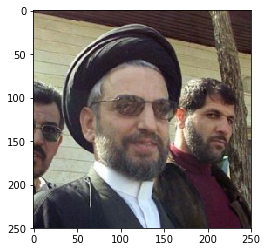

Hello human, You look like a ...:Portuguese water dog
torch.Size([1, 3, 224, 224])
the path of the file: lfw_user/IMG_1353.png


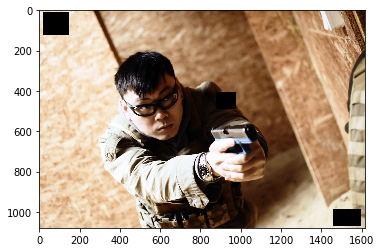

Error, Alien
torch.Size([1, 3, 224, 224])
the path of the file: lfw_user/star.png


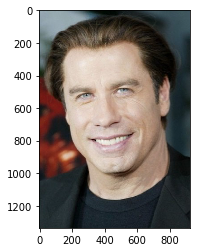

Hello human, You look like a ...:Chinese crested
torch.Size([1, 3, 224, 224])
the path of the file: lfw_user/Vladimir.png


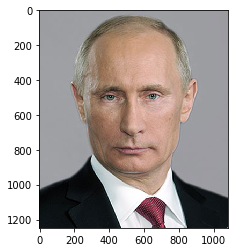

Hello human, You look like a ...:Parson russell terrier
torch.Size([1, 3, 224, 224])
the path of the file: lfw_user/thomas.JPG


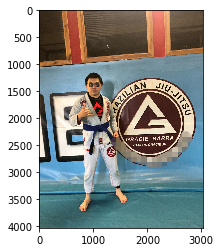

Hello human, You look like a ...:Plott
torch.Size([1, 3, 224, 224])
the path of the file: lfw_user/rapper.png


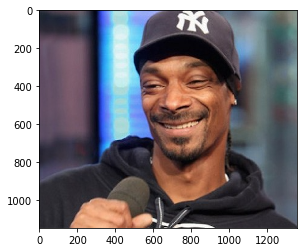

Hello human, You look like a ...:Xoloitzcuintli
torch.Size([1, 3, 224, 224])
the path of the file: dogImages_user/Lhasa_apso_06649.jpg


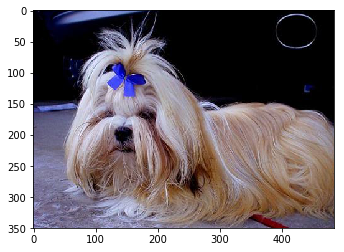

Hello! The predicted dog breed is: Havanese
torch.Size([1, 3, 224, 224])
the path of the file: dogImages_user/IMG_1627.jpg


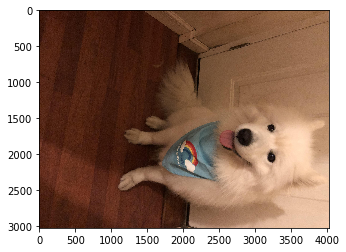

Hello! The predicted dog breed is: American eskimo dog
torch.Size([1, 3, 224, 224])
the path of the file: dogImages_user/Yorkshire_terrier_08348.jpg


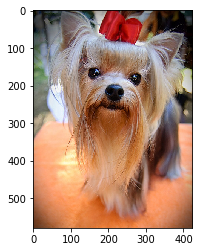

Hello! The predicted dog breed is: Yorkshire terrier
torch.Size([1, 3, 224, 224])
the path of the file: dogImages_user/german shepherd_4.jpg


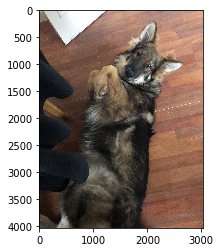

Hello! The predicted dog breed is: Keeshond
torch.Size([1, 3, 224, 224])
the path of the file: dogImages_user/Black_russian_terrier_01837.jpg


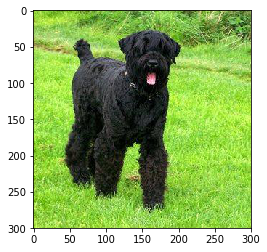

Hello! The predicted dog breed is: Black russian terrier
torch.Size([1, 3, 224, 224])
the path of the file: dogImages_user/german shepherd_5.jpg


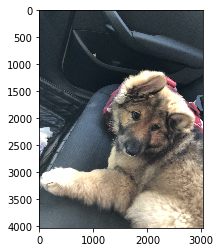

Hello! The predicted dog breed is: Akita
torch.Size([1, 3, 224, 224])
the path of the file: dogImages_user/german shepherd_1.jpg


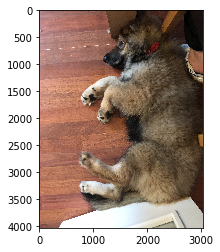

Hello! The predicted dog breed is: Alaskan malamute
torch.Size([1, 3, 224, 224])
the path of the file: dogImages_user/german shepherd_2.JPG


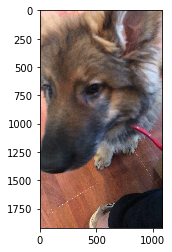

Hello! The predicted dog breed is: Icelandic sheepdog
torch.Size([1, 3, 224, 224])
the path of the file: dogImages_user/german shepherd_3.jpg


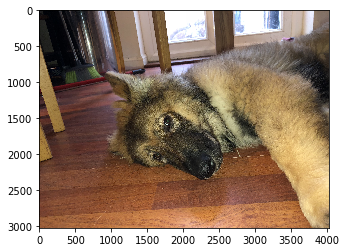

Hello! The predicted dog breed is: Keeshond


In [140]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## in online notebook I use existing files instead of my own images
## suggested code, below
human_files_user = np.array(glob("lfw_user/*"))
dog_files_user = np.array(glob("dogImages_user/*"))

for file in np.hstack((human_files_user[:6], dog_files_user[:9])):
#for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)